In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

C:\Users\Anjishnu Roy\AppData\Local\Temp\ipykernel_2440\1825603519.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [54]:
df_reviews = pd.read_csv('./review_dataset.csv')
df_reviews.head()

product_name  \
0  Sony PlayStation PS2 Gaming Console 150 GB Har...   
1           Vmax HX 750 Quadcopter Drone (No Camera)   
2  Yoshops VR BOX Virtual Reality Glasses Headset...   
3   Sony PlayStation PS3 Console Slim 320 GB (Black)   
4                                 Barbie Doll (pink)   

                                         product_url      category   status  \
0  https://yoshops.com/products/sony-playstation-...  Toys & Games  Reviewd   
1  https://yoshops.com/products/hx-750-remote-con...  Toys & Games  Reviewd   
2  https://yoshops.com/products/yoshops-vr-box-vi...  Toys & Games  Reviewd   
3  https://yoshops.com/products/sony-playstation-...  Toys & Games  Reviewd   
4           https://yoshops.com/products/barbie-doll  Toys & Games  Reviewd   

             stars  
0  5.0 star rating  
1  5.0 star rating  
2  5.0 star rating  
3  4.9 star rating  
4  4.9 star rating

<h2>1. Customer Reviews</h2>

In [55]:
#re-run previous code block before re executing as dataset is being modified
df_reviews['stars'] = df_reviews['stars'].str[:4]
df_reviews['stars'] = pd.to_numeric(df_reviews['stars'], errors='coerce')
#df_reviews.head()

<AxesSubplot:xlabel='stars', ylabel='count'>

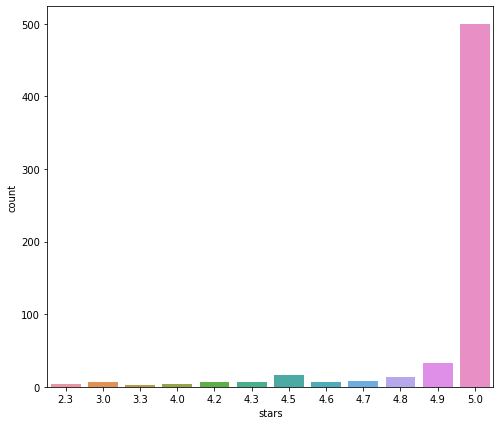

In [14]:
#basic plot
plt.figure(figsize=(8,7))
sns.countplot(data=df_reviews, x='stars')

<h2>2. Customer payment methods </h2>

In [56]:
df_orders = pd.read_csv('./orders_2016-2020_DataSet.csv')
df_orders.head()

Order #  Order Date and Time Stamp Fulfillment Status Payment Status  \
0  R929392577  09-11-2020 20:36:26 +0530        Unfulfilled         Unpaid   
1  R653462960  09-11-2020 20:18:26 +0530        Unfulfilled         Unpaid   
2  R226302759  09-11-2020 19:56:21 +0530        Unfulfilled         Unpaid   
3  R390235057  09-11-2020 19:37:40 +0530        Unfulfilled         Unpaid   
4  R813855117  09-11-2020 18:35:47 +0530          Cancelled           Paid   

  Payment Date and Time Stamp Fulfillment Date and Time Stamp Currency  \
0                         NaN                             NaN      INR   
1                         NaN                             NaN      INR   
2                         NaN                             NaN      INR   
3                         NaN                             NaN      INR   
4                         NaN                             NaN      INR   

   Subtotal Shipping Method Shipping Cost  ... Payment Method Tracking #  \
0  ₹ 799.00      Ships Free        ₹ 0.00  ...            NaN        NaN   
1  ₹ 699.00      Ships Free        ₹ 0.00  ...            NaN        NaN   
2  ₹ 799.00      Ships Free        ₹ 0.00  ...            NaN        NaN   
3  ₹ 599.00      Ships Free        ₹ 0.00  ...            NaN        NaN   
4  ₹ 699.00      Ships Free        ₹ 0.00  ...            NaN        NaN   

  Special Instructions                                      LineItem Name  \
0                  NaN  Boat Rockerz 530 Bluetooth Headphone with Mic ...   
1                  NaN  Samsung U Flex Wireless Bluetooth Flexible Hea...   
2                  NaN  Boat Rockerz 530 Bluetooth Headphone with Mic ...   
3                  NaN                         JBL Tempo On-Ear Headphone   
4                  NaN     Mi Neckband Bluetooth Headset with Mic (Black)   

  LineItem SKU LineItem Options LineItem Add-ons LineItem Qty  \
0          NaN              NaN              NaN            1   
1  PL000032123              NaN              NaN            1   
2          NaN              NaN              NaN            1   
3     PL000157              NaN              NaN            1   
4  PL000041332              NaN              NaN            1   

  LineItem Sale Price LineItem Type  
0            ₹ 799.00      physical  
1            ₹ 699.00      physical  
2            ₹ 799.00      physical  
3            ₹ 599.00      physical  
4            ₹ 699.00      physical  

[5 rows x 41 columns]

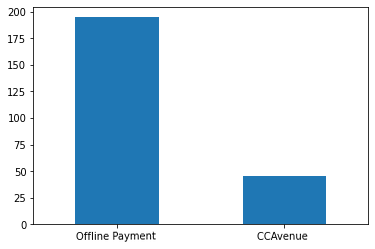

In [57]:
new = df_orders['Payment Method'].str.split('₹', expand=True)
new[0].value_counts().plot.bar(rot=.4);

<AxesSubplot:ylabel='0'>

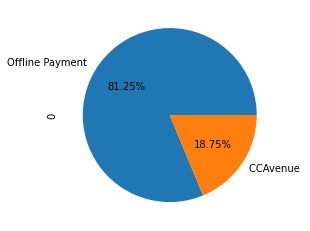

In [58]:
new = df_orders['Payment Method'].str.split('₹', expand=True)
new[0].value_counts(normalize=True).plot.pie(rot=.4, autopct='%.2f%%')

<h2>3. Top Consumers (States)</h2>

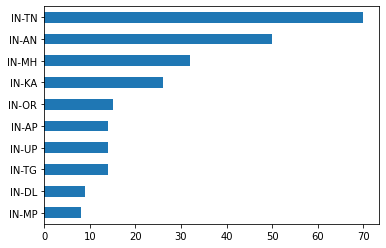

In [59]:
df_orders['Billing State'].value_counts(ascending=False)[:10].sort_values().plot.barh();

<h2>4. Top Consumers (Cities)</h2>

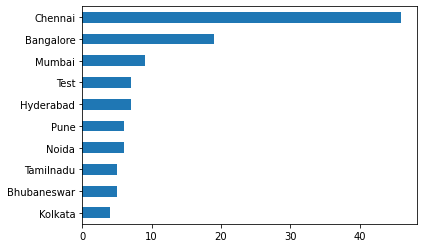

In [60]:
data = df_orders['Billing City']
data.str.capitalize().value_counts()[:10].sort_values().plot.barh();

<h2>5. Top selling product categories analysis</h2>

In [61]:
df_reviews['category'].unique

<bound method Series.unique of 0       Toys & Games
1       Toys & Games
2       Toys & Games
3       Toys & Games
4       Toys & Games
            ...     
1856          Mumbai
1857          Mumbai
1858          Mumbai
1859          Mumbai
1860          Mumbai
Name: category, Length: 1861, dtype: object>

In [62]:
drops = ['Bengaluru','Chennai','Mumbai']
for elem in drops:
    df_reviews.drop(df_reviews.loc[df_reviews['category'] == elem].index, inplace=True)

In [63]:
df_reviews['category'].unique

<bound method Series.unique of 0                Toys & Games
1                Toys & Games
2                Toys & Games
3                Toys & Games
4                Toys & Games
                ...          
1544    Instagram Sponsorship
1545      YouTube Sponsorship
1546      YouTube Sponsorship
1547      YouTube Sponsorship
1548      YouTube Sponsorship
Name: category, Length: 1549, dtype: object>

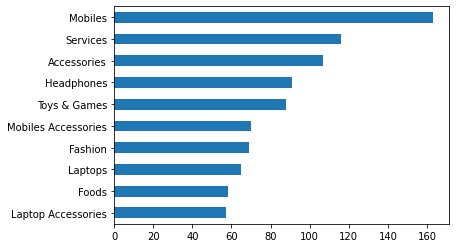

In [64]:
df_reviews['category'].value_counts()[:10].sort_values(ascending=True).plot.barh();

<h2>6. All product categories</h2>

In [65]:
df_reviews.groupby(['category'])['stars'].count().sort_values(ascending=True).plot.barh(figsize=(10, 12))

<AxesSubplot:ylabel='category'>

<h2>7. No. of orders per month per year</h2>

In [66]:
df_orders['Fulfillment Date and Time Stamp'] = pd.to_datetime(df_orders['Fulfillment Date and Time Stamp'], errors='coerce')

In [67]:
df_orders['month'] = df_orders['Fulfillment Date and Time Stamp'].dt.month
df_orders['year'] = df_orders['Fulfillment Date and Time Stamp'].dt.year

In [68]:
df_orders.groupby(['year','month'])['Order #'].count().sort_values(ascending=True).plot(kind='barh', figsize=(8, 10))

<AxesSubplot:ylabel='year,month'>

<h2>8. Reviews for Number of Orders Per Month Per Year</h2>

In [69]:
df_orders['Fulfillment Date and Time Stamp'] = pd.to_datetime(df_orders['Fulfillment Date and Time Stamp'], errors='coerce')

In [70]:
df_orders['month'] = df_orders['Fulfillment Date and Time Stamp'].dt.month
df_orders['year'] = df_orders['Fulfillment Date and Time Stamp'].dt.year

In [82]:
df_orders = df_orders.assign(stars=df_reviews['stars'])
df_orders.head()

Order #  Order Date and Time Stamp Fulfillment Status Payment Status  \
0  R929392577  09-11-2020 20:36:26 +0530        Unfulfilled         Unpaid   
1  R653462960  09-11-2020 20:18:26 +0530        Unfulfilled         Unpaid   
2  R226302759  09-11-2020 19:56:21 +0530        Unfulfilled         Unpaid   
3  R390235057  09-11-2020 19:37:40 +0530        Unfulfilled         Unpaid   
4  R813855117  09-11-2020 18:35:47 +0530          Cancelled           Paid   

  Payment Date and Time Stamp Fulfillment Date and Time Stamp Currency  \
0                         NaN                             NaT      INR   
1                         NaN                             NaT      INR   
2                         NaN                             NaT      INR   
3                         NaN                             NaT      INR   
4                         NaN                             NaT      INR   

   Subtotal Shipping Method Shipping Cost  ...  \
0  ₹ 799.00      Ships Free        ₹ 0.00  ...   
1  ₹ 699.00      Ships Free        ₹ 0.00  ...   
2  ₹ 799.00      Ships Free        ₹ 0.00  ...   
3  ₹ 599.00      Ships Free        ₹ 0.00  ...   
4  ₹ 699.00      Ships Free        ₹ 0.00  ...   

                                       LineItem Name LineItem SKU  \
0  Boat Rockerz 530 Bluetooth Headphone with Mic ...          NaN   
1  Samsung U Flex Wireless Bluetooth Flexible Hea...  PL000032123   
2  Boat Rockerz 530 Bluetooth Headphone with Mic ...          NaN   
3                         JBL Tempo On-Ear Headphone     PL000157   
4     Mi Neckband Bluetooth Headset with Mic (Black)  PL000041332   

  LineItem Options LineItem Add-ons LineItem Qty LineItem Sale Price  \
0              NaN              NaN            1            ₹ 799.00   
1              NaN              NaN            1            ₹ 699.00   
2              NaN              NaN            1            ₹ 799.00   
3              NaN              NaN            1            ₹ 599.00   
4              NaN              NaN            1            ₹ 699.00   

  LineItem Type month year stars  
0      physical   NaN  NaN   5.0  
1      physical   NaN  NaN   5.0  
2      physical   NaN  NaN   5.0  
3      physical   NaN  NaN   4.9  
4      physical   NaN  NaN   4.9  

[5 rows x 44 columns]

In [91]:
df_orders.groupby(['stars'])['Order #'].count().sort_values(ascending=True).plot(kind='barh', figsize=(8, 10))

<AxesSubplot:ylabel='stars'>

<h2>9. No. of orders across parts of day</h2>

In [92]:
df_orders['day'] = df_orders['Fulfillment Date and Time Stamp'].dt.weekday

In [93]:
df_orders.groupby(['day'])['Order #'].count().plot(kind='bar');

<h2>10. Full Report</h2>

In [98]:
profile_1 = ProfileReport(df_reviews)
profile_1

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


In [99]:
profile_2 = ProfileReport(df_orders)
profile_2

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]
